# Image Data Augmentation

## Installs

In [57]:
#@title Install Dependencies
!pip install imgaug --quiet
!pip install albumentations --quiet
!pip install torchvision --quiet
!pip install opencv-python --quiet

## Env Config

In [ ]:
#@title Imports
import imgaug.augmenters as iaa
import cv2
import matplotlib.pyplot as plt

In [60]:
#@title Env params

IMG_PATH = 'example.jpg' #@param

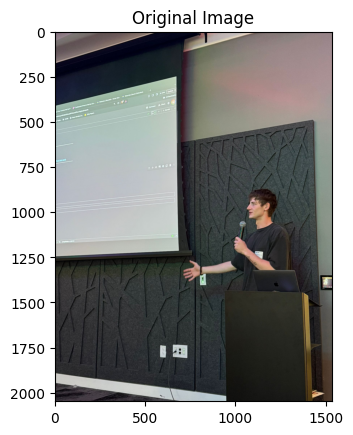

In [85]:
#@title Load image

image = cv2.imread(IMG_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Original Image")
plt.show()

## Image Augmentation Options

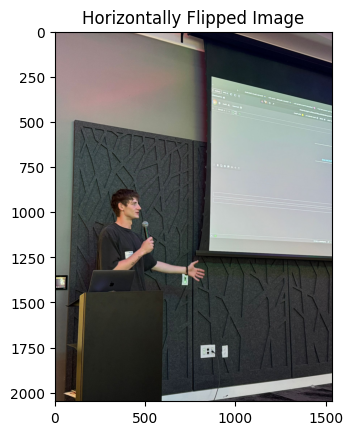

In [63]:
#@title Flipping

import imgaug.augmenters as iaa

# flip horizontally
flip_aug = iaa.Fliplr(1.0)  # 1.0 means always flip

augmented_image = flip_aug.augment_image(image)

plt.imshow(augmented_image)
plt.title("Horizontally Flipped Image")
plt.show()


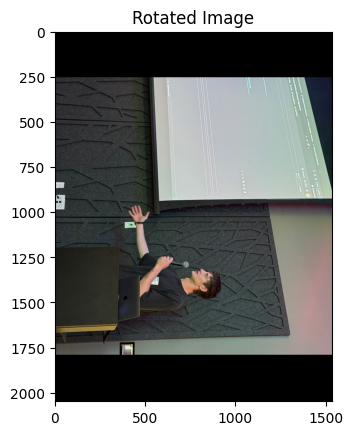

In [75]:
#@title Option 2: Rotation
rotate_aug = iaa.Affine(rotate=(90)) # rotating 90 degrees, if you pass in a tupple, rotate will pick a random value between your two params

augmented_image = rotate_aug.augment_image(image)

plt.imshow(augmented_image)
plt.title("Rotated Image")
plt.show()

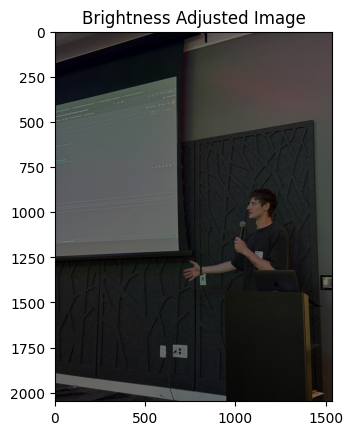

In [79]:
#@title Brightness Adjustment

brightness_aug = iaa.Multiply((0.5))

augmented_image = brightness_aug.augment_image(image)

plt.imshow(augmented_image)
plt.title("Brightness Adjusted Image")
plt.show()

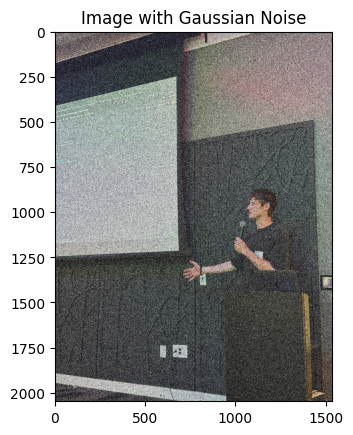

In [76]:
#@title Option 4: Random Noise

noise_aug = iaa.AdditiveGaussianNoise(scale=(100)) # standard deviation fixed at 100

augmented_image = noise_aug.augment_image(image)

plt.imshow(augmented_image)
plt.title("Image with Gaussian Noise")
plt.show()

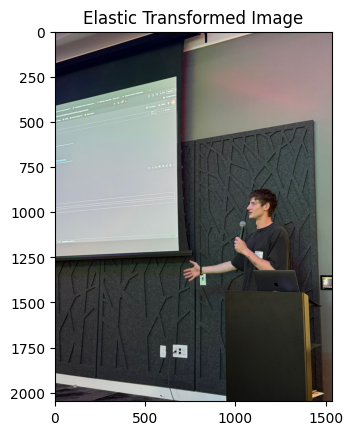

In [84]:
#@title Distortions (Elastic Transformation)

elastic_aug = iaa.ElasticTransformation(alpha=100, sigma=3) # alpha contols level of distortions, sigma controls focus on unnoticable distortions

augmented_image = elastic_aug.augment_image(image)

plt.imshow(augmented_image)
plt.title("Elastic Transformed Image")
plt.show()

# NLP Data Augmentation

## Installs

In [1]:
#@title Install Dependencies
!pip install --upgrade gensim --quiet
!pip install transformers --quiet
!pip install sacremoses --quiet
!pip install nlpaug --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 15.8 MB/s eta 0:00:00


In [4]:
#@title Download Models

DownloadUtil.download_word2vec(dest_dir = '.')
# Possible values are ‘wiki-news-300d-1M’, ‘wiki-news-300d-1M-subword’, ‘crawl-300d-2M’ and ‘crawl-300d-2M-subword’

DownloadUtil.download_fasttext(dest_dir = '.', model_name = 'crawl-300d-2M')

# for synonym replacement
DownloadUtil.download_glove(dest_dir = '.', model_name = 'glove.6B')

Downloading...
From (original): https://drive.google.com/uc?export=download&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?export=download&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=9317ca66-0094-4d50-a55a-55480089090a
To: /content/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [00:13<00:00, 120MB/s]


## Config Env

In [3]:
#@title Imports (restart runtime)
import gensim
print(gensim.__version__)

import transformers

import sacremoses # for back translation tokenizer

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from nlpaug.util import Action
from nlpaug.util.file.download import DownloadUtil

4.3.3


In [54]:
#@title Example Sentence for Augmentation

TEXT = "I have been riding my scooter to the store everyday to get bananas." #@param

## Options for NLP Data Augmentation

In [45]:
#@title Option 1: Replace words with other most similar words

aug = naw.WordEmbsAug(
  model_type = "word2vec",
  model_path = "GoogleNews-vectors-negative300.bin",
  action = "substitute",  # "insert" is another option that doesn't remove og words
  aug_p = 0.25 # probability of token selection for replacement
  )

## Other Models you can use
# aug = naw.WordEmbsAug(
#   model_type = 'fasttext',
#   model_path = 'crawl-300d-2M.vec',
#   action = "insert"
#   )

# aug = naw.WordEmbsAug(
#   model_type = 'glove',
#   model_path = 'glove.6B.300d.txt',
#   action = "substitute"
#   )


# Augment the text
augmented_text = aug.augment(TEXT)
print(f"Original:         {TEXT}\n")
print(f"Augmented Text:   {augmented_text}")

Original:         Tall men are so clumsy.

Augmented Text:   ['Elegant men arenow so clumsy.']


In [46]:
#@title Option 2: Add context words based on nearest embeddings

aug = naw.ContextualWordEmbsAug(
  model_path = 'bert-base-uncased',
  action = "insert",
  aug_p = 0.25
  )

augmented_text = aug.augment(TEXT)

print(f"Original:         {TEXT}\n")
print(f"Augmented Text:   {augmented_text}")

Original:         Tall men are so clumsy.

Augmented Text:   ['tall men are always so goddamn clumsy.']


In [47]:
#@title Option 3: Synonym Replacement

aug = naw.SynonymAug(
    aug_src = "wordnet",
    aug_max = 3 # aug_p words too but this allows us to limit how many words are changed
    )
augmented_text = aug.augment(TEXT)

print(f"Original:         {TEXT}\n")
print(f"Augmented Text:   {augmented_text}")

Original:         Tall men are so clumsy.

Augmented Text:   ['Tall men make up so unwieldy.']


In [56]:
#@title Option 4: Translations (and back translation)

back_translation_aug = naw.BackTranslationAug(
    from_model_name = 'facebook/wmt19-en-de',
    to_model_name = 'facebook/wmt19-de-en'
)

augmented_text = back_translation_aug.augment(TEXT)

print(f"Original:         {TEXT}\n")
print(f"Augmented Text:   {augmented_text}")

Original:         I have been riding my scooter to the store everyday to get bananas.

Augmented Text:   ['I used to go to the shop every day on my scooter to get bananas.']
